In [1]:
from joblib import load
import os
import cv2
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, log_loss, precision_score, recall_score


# Charger le modèle
logreg_model = load('../sckitlearn/logreg_model.joblib')

In [2]:
test_dir = '../dataset/TEST'

test_images = []
test_labels = []

# Labelisation des images en fonction de leur nom
for file in os.listdir(test_dir):
    image_path = os.path.join(test_dir, file)
    image = cv2.imread(image_path)

    if image is not None:
        #Tranformation de l'image en niveau de gris et redimensionnement
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (256, 256))

        # Aplatir l'image en un vecteur 1D
        image_flattened = image.flatten()

        # Labelisation des images 0: Normal, 1: Virus, 2: Bacteria
        if "virus" in file.lower():
            label = 1
        elif "bacteria" in file.lower():
            label = 2
        else:
            label = 0

        test_images.append(image_flattened)
        test_labels.append(label)
    else:
        print(f"Image not loaded correctly: {image_path}")

# Convertir les listes en tableaux numpy
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Prédire les labels des images de test
y_pred_test = logreg_model.predict(test_images)

# Calculer l'accuracy
accuracy_test = accuracy_score(test_labels, y_pred_test)
print("Accuracy on test dataset:", accuracy_test)

# Calculer le F1 Score
f1_score_test = f1_score(test_labels, y_pred_test, average='macro')
print("F1 Score on test dataset:", f1_score_test)

# Calculer le Log Loss
# Premièrement, prédire les probabilités
y_pred_proba_test = logreg_model.predict_proba(test_images)
# Ensuite, calculer le log loss
log_loss_test = log_loss(test_labels, y_pred_proba_test)
print("Log Loss on test dataset:", log_loss_test)

Accuracy on test dataset: 0.67008547008547
F1 Score on test dataset: 0.6526787279622047
Log Loss on test dataset: 11.26808555564115


Accuracy on test dataset: 0.67008547008547
Precision on test dataset: 0.6636398966201266
Recall on test dataset: 0.6812903898269752
F1 Score on test dataset: 0.6526787279622047
Log Loss on test dataset: 11.26808555564115


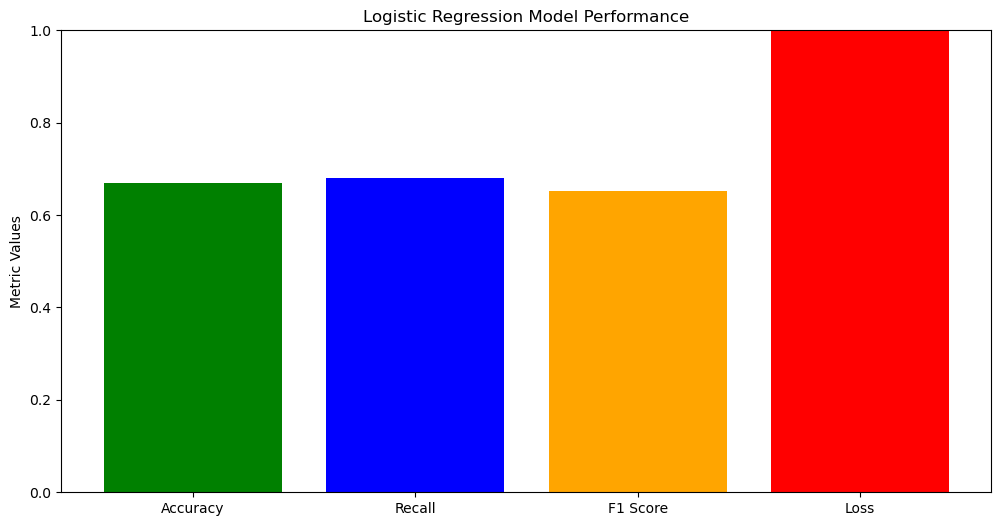

In [4]:
# Calculer la précision et le recall
precision_test = precision_score(test_labels, y_pred_test, average='macro')
recall_test = recall_score(test_labels, y_pred_test, average='macro')

# Afficher les résultats
print("Accuracy on test dataset:", accuracy_test)
print("Precision on test dataset:", precision_test)
print("Recall on test dataset:", recall_test)
print("F1 Score on test dataset:", f1_score_test)
print("Log Loss on test dataset:", log_loss_test)

import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Recall', 'F1 Score', 'Loss']
values = [accuracy_test, recall_test, f1_score_test, log_loss_test]

plt.figure(figsize=(12, 6))
plt.bar(metrics, values, color=['green', 'blue', 'orange', 'red', 'purple'])
plt.title('Logistic Regression Model Performance')
plt.ylabel('Metric Values')
plt.ylim(0, 1)  # Assuming log loss is normalized or you adjust according to your scale
plt.show()

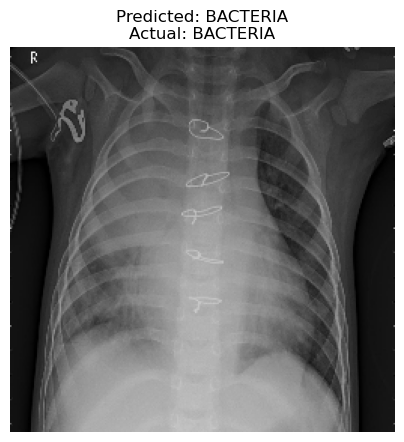

In [5]:
from visualize_prediction import visualize_single_prediction
visualize_single_prediction(test_images, test_labels, logreg_model)